# **Social Network Ads Prediction using SVM**

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
df = pd.read_csv('C:\\Users\\Home\\Downloads\\archive\\Social_Network_Ads.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [21]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [22]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


In [23]:
X = df.drop('Purchased', axis=1)
Y = df['Purchased']

In [24]:
X = df.drop('Gender', axis=1)
Y = df['Gender']

In [25]:
gender_mapping = {'Male': 0, 'Female': 1}

df['Gender'] = df['Gender'].map(gender_mapping)

df['Gender'] = df['Gender'].astype(float)

In [26]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [27]:
from sklearn.svm import SVC

In [28]:
svm_clf = SVC(kernel='rbf', C=1.0)
svm_clf.fit(x_train, y_train)

SVC()

In [29]:
y_pred = svm_clf.predict(x_test)

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [31]:
score = accuracy_score(y_test, y_pred)
print(score)

0.5125


In [32]:
mat = confusion_matrix(y_test, y_pred)
print(mat)

[[23 21]
 [18 18]]


In [33]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

      Female       0.56      0.52      0.54        44
        Male       0.46      0.50      0.48        36

    accuracy                           0.51        80
   macro avg       0.51      0.51      0.51        80
weighted avg       0.52      0.51      0.51        80



In [34]:
from sklearn.inspection import DecisionBoundaryDisplay

Done


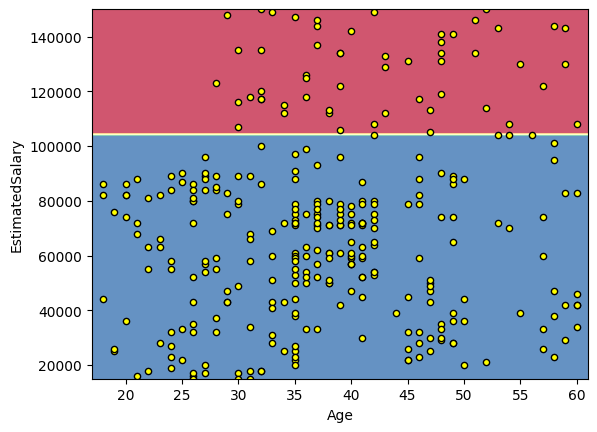

In [45]:
x_train_2d = x_train[['Age', 'EstimatedSalary']]

svm_clf = SVC(kernel='rbf', C=1.0)
svm_clf.fit(x_train_2d, y_train)

DecisionBoundaryDisplay.from_estimator(
    svm_clf,
    x_train_2d,
    response_method="predict",
    cmap=plt.cm.Spectral,
    alpha=0.8,
    xlabel='Age',
    ylabel='EstimatedSalary',
)

plt.scatter(x_train_2d['Age'], x_train_2d['EstimatedSalary'],
            c='yellow',
            s=20, edgecolors="k")
print("Done")
